In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import category_encoders as category_encoder
import plotly as py
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [28]:
df = pd.read_csv("Insert The File Path")
df.head()


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [14]:
df.drop_duplicates()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [15]:
label_encoder = LabelEncoder()
def encode_column_data(df, column_name):
    df[column_name] = label_encoder.fit_transform(df[column_name])
    return df[column_name]


In [18]:
df['yummy'] = encode_column_data(df, 'yummy')
df['convenient'] = encode_column_data(df, 'convenient')
df['spicy'] = encode_column_data(df, 'spicy')
df['fattening'] = encode_column_data(df, 'fattening')
df['greasy'] = encode_column_data(df, 'greasy')
df['fast'] = encode_column_data(df, 'fast')
df['cheap'] = encode_column_data(df, 'cheap')
df['tasty'] = encode_column_data(df, 'tasty')
df['expensive'] = encode_column_data(df, 'expensive')
df['healthy'] = encode_column_data(df, 'healthy')
df['disgusting'] = encode_column_data(df, 'disgusting')
df['Gender'] = encode_column_data(df, 'Gender')
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,0
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,0
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,0
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,0
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,1


In [19]:
def encode_column_visit_frequency(data):
    ordinal_encoder = category_encoder.OrdinalEncoder(cols=['VisitFrequency'], return_df=True,
                                                      mapping=[{'col': 'VisitFrequency',
                                                                'mapping': {'Never': 0, 'Once a year': 1, 'Every three months': 2, 'Once a month': 3, 'Once a week': 4, 'More than once a week': 5}}])
    data_encoded = ordinal_encoder.fit_transform(data)
    return data_encoded


In [20]:
df = encode_column_visit_frequency(df)


In [21]:
#Replacing Numeric String values to int32 format
df['Like'] = df['Like'].replace({'I hate it!-5': -5, 'I love it!+5': 5, '-4': -4,
                                '-3': -3, '-2': -2, '-1': -1, '+4': 4, '+3': 3, '+2': 2, '+1': 1}).astype('int32')


<AxesSubplot:>

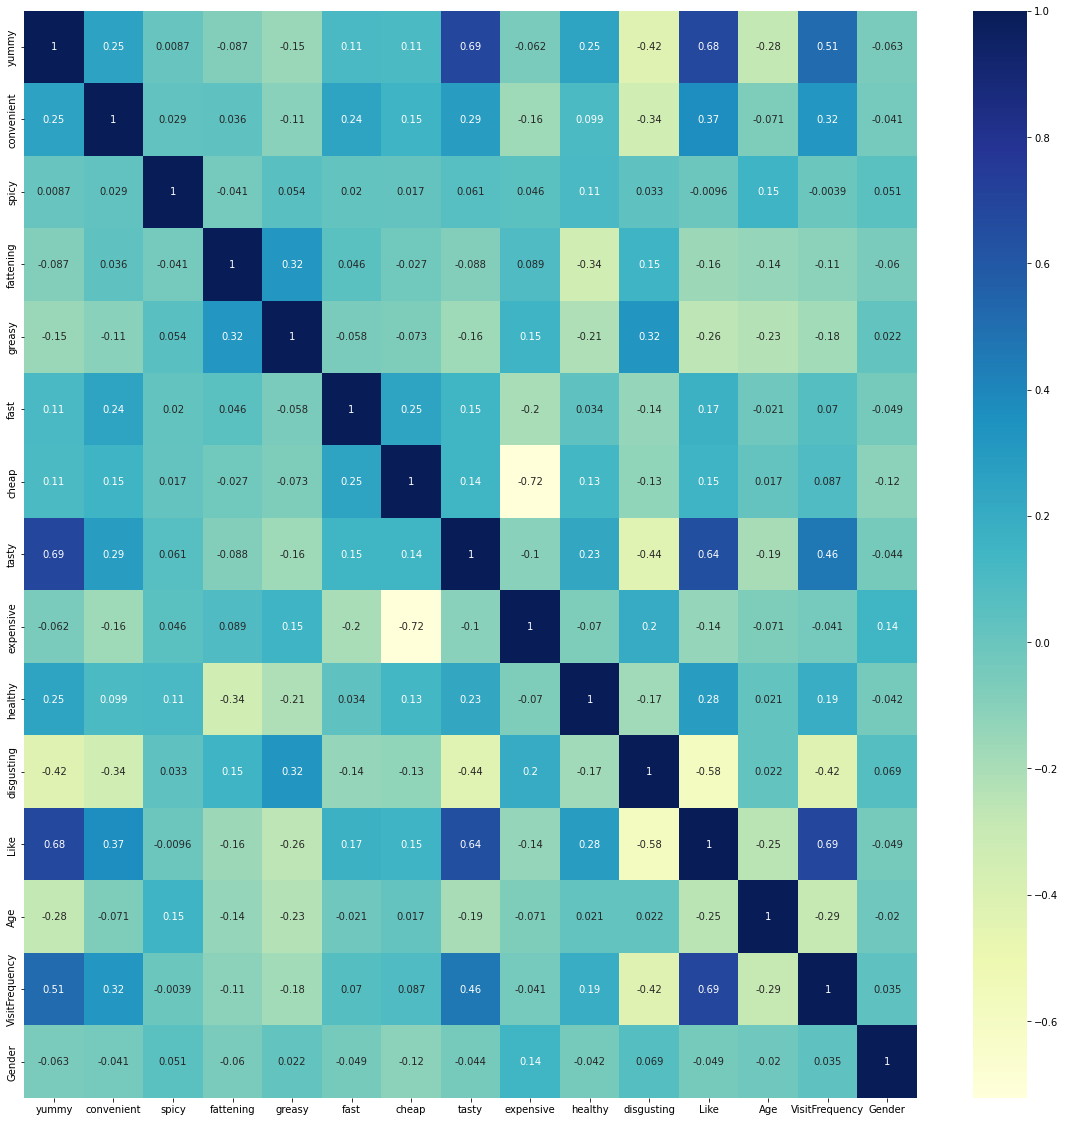

In [25]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
